## implementing PCA from scratch

**the steps is as follows:**
<br>
1. normalize the data and save the mean and variance of the features
2. calculate the covariance matrix
3. calculate the eigen values and vectors of the  covariance
4. order the eigen values and get the 95% sum
5. put the corresponding eigen vectors in a matrix
6. normalize the new vector (by the mean and variance calculated in step 1)
7. multiply the new vector by that matrix

**note that the sum of the eigen values of the cov matrix are the trace of the cov matrix**
<br>
**meaning that the sum will be equal to the number of features**

**note that normalizing the data using standardization (mean = 0 , std = 1) is a must**
<br>
**normalizing the data using min max normalization is not recommended in PCA)**

## imports

In [2]:
import numpy as np
import pandas as pd

## pca class

In [74]:
class PCA ():
    """
    this class to calculate the principle components of the data
    1. make an object and pass the number of principle components (or the percent of the information to keep (preserve))
    2. call the fit function and pass the data (m,n)
    3. call the transform function to transform the new data (*,n)
    
    self.norm ---> the magnitude of each variable (feature) (1,n)
    self.mean ---> the mean of all the variable (features) (1,n)
    self.std  ---> the std - deviation of all the variables (features) (1,n)
    """

    def __init__(self,n_components = 2):
        """ this init function takes a single parameter:
            n_component : may refer to the number of components (features) to use in pca(if n_component >1)
            n_component : may refer to the ration of the information you want to keep (preserve)  (if n_componen<1)
        """
        self.n_components = n_components
        if self.n_components > 1:
            self.type = 'var'
        else:
            self.type = 'ratio'

    def fit(self,X):
        """ this function takes one parameter : X
            X is the data (numpy nd array or data frame(all numeric columns)) (m*n) matrix
            and this function returns X_new (m*k) matrix where k < n
            
            this function also saves the means and variance of each feature 
            this function also saves the new components (new features) (n principle components)
            after getting the n principle components we take only k components (highest variance)
        """
        
        X = np.array(X)
        ## the dimensions of X
        m,n = X.shape
        
        
        ##########################
        ## standardize the data ##
        ##########################
        self.mean = np.mean(X , axis =0 ).reshape(1,n) # this is the mean of all the features in the data
        #X_meaned = X - self.mean 
        self.std = np.std(X , axis = 0).reshape(1,n)
        X_standardized = (X-self.mean) / self.std
        
        
        #####################################
        ## step 2 calculate the cov matrix ##
        #####################################
        cov = np.cov(X_standardized , rowvar=False) ## rowvar = false to make the rows the observations and the columns are the features
        
        
        ######################################################################
        ## calculate the eigen values and eigen vectors (of the cov matrix) ##
        ######################################################################
        #note that eigen values may be zero if there is perfect correlation between 2 features (sol: using svd)
        eigen_values , eigen_vectors = np.linalg.eig(cov)
        
        ## sort the eigen values
        sorted_index = np.argsort(eigen_values)[::-1]
        
        sorted_eigen_values = eigen_values[sorted_index]
        sorted_eigen_values = sorted_eigen_values / sum(sorted_eigen_values)

        sorted_eigen_vectors = eigen_vectors [:,sorted_index]
        self.components = sorted_eigen_vectors
        
        ##################################
        ## get the desired eigen values ##
        ##################################
        self.cum_sum = np.cumsum(sorted_eigen_values)
            
        if self.type == 'var':
            self.explained_variance = sorted_eigen_values[:self.n_components]
            self.components = sorted_eigen_vectors[:,:self.n_components]
        else:
            self.components = sorted_eigen_vectors[:,self.cum_sum <= self.n_components] # the condition returns an array with true and false (if the cum_sum < ration you want then  return true) and return all the true values
            #np.where(cum_sum < self.n_components ) [0][-1] # get the last element where cum_sum < ratio u want
            self.explained_variance = sorted_eigen_values[self.cum_sum <= self.n_components]
        
        
        ########################
        ## transform the data ##
        ########################
        X_new = np.dot(X_standardized , self.components)        
        return X_new

    
    def transform(self,Z):
        Z_new = (Z - self.mean )/ self.std
        Z_new = np.dot(Z_new , self.components)

        return Z_new

    #optional 
    def plot_explained_variance(self):
        plt.bar(list(range(len(self.cum_sum))) ,self.cum_sum)
        plt.axhline(self.cum_sum[len(self.explained_variance) - 1 ]) # length of the explained variance (if 2 elements then it returns 2) but we want the second element


## trying pca on our data

1.0
[0.27295132 0.20314391 0.08812298 0.07480472 0.06225377 0.05739458
 0.04883802 0.04298569 0.03799891 0.03080077 0.02372381]
(8949, 11)


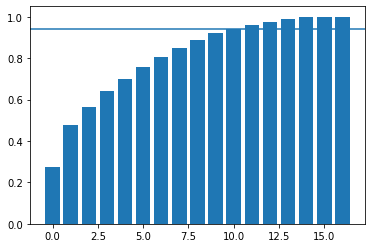

In [89]:
data_path = '../data/CC GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)
numerics = ['int16', 'int32', 'int64' , 'float']
df = df.select_dtypes(include=numerics)
df_copy = df
##
index_to_remove = df_copy[df_copy['CREDIT_LIMIT'].isna()].index[0] # [0] to return the integer only (as index returns index object which is basically a list)
df_copy.drop(index = index_to_remove , inplace = True)
df_copy.reset_index(drop = True) # to reset the index and drop the old index

df_copy['MINIMUM_PAYMENTS'].fillna(df_copy['MINIMUM_PAYMENTS'].median(),inplace = True)

##
p = PCA(n_components=0.95)
mat_reduced = p.fit(df_copy)
p.plot_explained_variance()
print(mat_reduced.shape)

## test the PCA class

In [76]:
import plotly.express as px
import pandas as pd
iris = px.data.iris()
iris.loc[:,'species']
iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


1.0000000000000002
[0.72770452 0.23030523]
(150, 2)


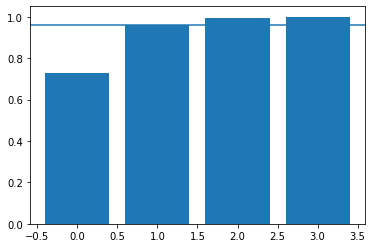

In [77]:
p = PCA(n_components=0.98)
#p.
#dir(px.data)
target = iris.loc[:,'species']
train = iris.drop(columns=['species_id' , 'species'])
#iris.drop(columns= 'species' , inplace = True)
train
mat_reduced = p.fit(train)
print(mat_reduced.shape)
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)
principal_df

p.plot_explained_variance()

In [69]:
import seaborn as sb
import matplotlib.pyplot as plt
 
plt.figure(figsize = (8,8))
px.scatter(principal_df , x = 'PC1' , y = 'PC2' , color = 'species')
#sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'species_id' , s = 60 , palette= 'icefire')

<Figure size 576x576 with 0 Axes>

### testing the normalization of matrix

In [1]:
################################################
## first normalize the data (normalize scalae) ##
################################################
self.norm = np.linalg.norm(X , axis = 0) ## to calculate the sum along the rows (sum for each column)
self.norm = self.norm.reshape(1,n)
X_normalized = X/self.norm  # norm is (1,n) and X is (m,n) (the division happens using broadcasting)


NameError: name 'np' is not defined

In [10]:
np.random.seed(42)
mat = np.random.rand(5,3)
mat*=10
norm = np.linalg.norm(mat , axis = 0) ## to calculate the sum along the rows (sum for each column)
norm = norm.reshape(1,3)
print(mat/norm)

from sklearn.preprocessing import normalize
normed_matrix = normalize(mat, axis=0, norm='l2')
print('-'*100)
print(normed_matrix)
norm.shape

[[0.28756604 0.72407724 0.53170589]
 [0.45964062 0.11882597 0.11331133]
 [0.04459569 0.6596918  0.43663803]
 [0.54364705 0.01567744 0.70452329]
 [0.63913644 0.16172042 0.13207405]]
----------------------------------------------------------------------------------------------------
[[0.28756604 0.72407724 0.53170589]
 [0.45964062 0.11882597 0.11331133]
 [0.04459569 0.6596918  0.43663803]
 [0.54364705 0.01567744 0.70452329]
 [0.63913644 0.16172042 0.13207405]]


(1, 3)

## 'test the mean of matrix'

In [11]:
n = mat.shape[1]
m = np.mean(mat , axis = 0).reshape(1,n)
mat - m
print(m)
print (m.shape)
print(mat.mean(axis = 0) )
print(np.std(mat,axis=0))

[[5.14359487 4.4116654  5.28167659]]
(1, 3)
[5.14359487 4.4116654  5.28167659]
[2.7332951  3.87513268 3.1637596 ]


In [12]:
m,n = mat.shape
m,n

(5, 3)

## test the eigen values of matrix

In [42]:
cov = np.cov(mat)
cov
eigen_values , eigen_vectors = np.linalg.eig(cov)
dic  = {eigen_values[i] : eigen_vectors[:,i] for i in range (len(eigen_values))}
print(dic.keys())

dict_keys([(51.00443263351894+0j), (3.9968028886505635e-15+0j), (18.475635861317514+0j), (-1.1895658831680309e-16+5.884231393908818e-16j), (-1.1895658831680309e-16-5.884231393908818e-16j)])


In [49]:
cov = np.cov(mat)
eigen_values , eigen_vectors = np.linalg.eig(cov)
dic  = {eigen_values[i] : eigen_vectors[:,i] for i in range (len(eigen_values))}
print(dic)
print(eigen_values ,'\n', eigen_vectors)
#dic_sorted = sorted(dic , key = dic.get)
#Dict_keys=sorted(dic, key=dic , reverse=True)  
sorted_eigen_values = sorted(eigen_values , reverse = True)
for value in sorted_eigen_values:
    print(dic[value].shape)
eigen_vectors[:,0].shape

{(51.00443263351894+0j): array([ 0.405308  +0.j, -0.31681702+0.j,  0.56980086+0.j, -0.46131542+0.j,
       -0.44482295+0.j]), (3.9968028886505635e-15+0j): array([-0.91177689+0.j, -0.16091774+0.j,  0.26410712+0.j, -0.14368783+0.j,
       -0.2288441 +0.j]), (18.475635861317514+0j): array([ 0.06624449+0.j, -0.27643969+0.j,  0.14887156+0.j,  0.84480367+0.j,
       -0.42817845+0.j]), (-1.1895658831680309e-16+5.884231393908818e-16j): array([-0.37322606-0.1856674j ,  0.65802895+0.j        ,
        0.29834832+0.31600533j, -0.01585376+0.05131766j,
       -0.41012624+0.18239617j]), (-1.1895658831680309e-16-5.884231393908818e-16j): array([-0.37322606+0.1856674j ,  0.65802895-0.j        ,
        0.29834832-0.31600533j, -0.01585376-0.05131766j,
       -0.41012624-0.18239617j])}
[ 5.10044326e+01+0.00000000e+00j  3.99680289e-15+0.00000000e+00j
  1.84756359e+01+0.00000000e+00j -1.18956588e-16+5.88423139e-16j
 -1.18956588e-16-5.88423139e-16j] 
 [[ 0.405308  +0.j         -0.91177689+0.j          0.066

(5,)

In [44]:
mat[:,[0,1]]

array([[3.74540119, 9.50714306],
       [5.98658484, 1.5601864 ],
       [0.58083612, 8.66176146],
       [7.08072578, 0.20584494],
       [8.32442641, 2.12339111]])

## test the list sorting and index

In [6]:
lst = [21,2,3,4]
lst.index(21)

0

## test argsort in numpy

In [47]:
numpy_arr = np.array([1,3,2,4,3,6,7]) 
np.argsort(numpy_arr)

matr = np.array([[1,2] , [3,4]])
matr[:,[1,0]]

array([[2, 1],
       [4, 3]])

# important 
## use np.cov(x.T) not cov(x) 
## u want the output of cov will return n*n (number of features)

In [28]:

import math
import os
import random
import re
import sys



if __name__ == '__main__':
    s = input()
    Dict={}
    for x in sorted(s):
        Dict[x]=Dict.get(x,0)+1  
    #print (Dict)
    #Sorting Dict by value & storing sorted keys in Dict_keys.
    Dict_keys=sorted(Dict, key=Dict.get, reverse=True)  
    #print(Dict_keys)
    for key in Dict_keys[:3]:
        print(key,Dict[key])

dsfafgdgfffgg
f 5
g 4
d 2


In [32]:
n = np.array([1,2,3,5,6])
np.where(n<6)[0][-1] # get the index of the last element 

3